In [1]:
import sys
import os
sys.path.append(os.path.abspath('../src'))
from data_processing.preprocessing import *

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from model.lstm import *
from model.metrics import *

In [2]:
# Liste des symboles des principales banques européennes
european_banks = [
    'BNP.PA',   # BNP Paribas
    'GLE.PA',   # Société Générale 
    'ACA.PA',   # Crédit Agricole 
    'HSBA.L',   # HSBC (UK)
    'BARC.L',   # Barclays (UK)
    'DBK.DE',   # Deutsche Bank (Germany)
    'UBSG.SW',  # UBS Group (Switzerland)
    'INGA.AS',  # ING Group (Netherlands)
    'ISP.MI',   # Intesa Sanpaolo (Italy)
    'SAN.MC',   # Banco Santander (Spain)
    'BBVA.MC'   # BBVA (Spain)
]

# à partir de 2013
start_date = '2013-01-01'
end_date = '2024-11-07'

data = prepare_stock_data(european_banks, start_date, end_date)


Téléchargement des données pour BNP.PA...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour GLE.PA...
Téléchargement des données pour ACA.PA...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour HSBA.L...
Téléchargement des données pour BARC.L...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour DBK.DE...
Téléchargement des données pour UBSG.SW...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Téléchargement des données pour INGA.AS...
Téléchargement des données pour ISP.MI...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour SAN.MC...
Téléchargement des données pour BBVA.MC...


[*********************100%***********************]  1 of 1 completed

Nombre de valeurs manquantes au début : 0
Nombre total de valeurs manquantes après traitement: 0


In [3]:
data.head()

BNP.PA                                                         \
Price       Adj Close      Close       High        Low       Open     Volume   
Ticker         BNP.PA     BNP.PA     BNP.PA     BNP.PA     BNP.PA     BNP.PA   
Date                                                                           
2013-01-02  22.753111  44.459999  44.564999  43.419998  43.930000  3604846.0   
2013-01-03  22.753111  44.459999  44.544998  44.014999  44.240002  1719620.0   
2013-01-04  22.714727  44.384998  44.720001  43.955002  44.360001  1969483.0   
2013-01-07  23.136934  45.209999  46.064999  45.119999  45.250000  4186011.0   
2013-01-08  23.385139  45.695000  46.555000  45.064999  45.154999  4068024.0   

               GLE.PA                                   ...    SAN.MC  \
Price       Adj Close      Close       High        Low  ...      High   
Ticker         GLE.PA     GLE.PA     GLE.PA     GLE.PA  ...    SAN.MC   
Date                                                    ...             
2013-01-02  17.845957  29.850000  29.870001  29.059999  ...  5.965555   
2013-01-03  17.681549  29.575001  29.850000  29.400000  ...  5.966497   
2013-01-04  17.535074  29.330000  29.620001  29.110001  ...  6.003258   
2013-01-07  18.013353  30.129999  30.434999  29.905001  ...  6.041903   
2013-01-08  18.584307  31.084999  31.355000  30.000000  ...  6.019281   

                                              BBVA.MC                          \
Price            Low      Open       Volume Adj Close   Close    High     Low   
Ticker        SAN.MC    SAN.MC       SAN.MC   BBVA.MC BBVA.MC BBVA.MC BBVA.MC   
Date                                                                            
2013-01-02  5.787408  5.843962   84000802.0  3.883120   7.287   7.287   7.045   
2013-01-03  5.896747  5.909000   31346019.0  3.860739   7.245   7.290   7.171   
2013-01-04  5.925966  5.947646   83958757.0  3.899640   7.318   7.319   7.210   
2013-01-07  5.948588  5.993832   99865587.0  3.946534   7.406   7.419   7.333   
2013-01-08  5.906172  5.942933  204031624.0  3.970513   7.451   7.497   7.330   

                                 
Price         Open       Volume  
Ticker     BBVA.MC      BBVA.MC  
Date                             
2013-01-02   7.096  193615334.0  
2013-01-03   7.215  404850032.0  
2013-01-04   7.240  205290519.0  
2013-01-07   7.333   67371537.0  
2013-01-08   7.363   56140482.0  

[5 rows x 66 columns]

In [4]:
# Filtrer les colonnes associées à BNP.PA
bnp_data = data['BNP.PA']  # Cela sélectionne toutes les sous-colonnes sous 'BNP.PA'

# (Optionnel) Réinitialiser l'index pour une présentation plus lisible
bnp_data = bnp_data.reset_index()

bnp_data.head()


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,BNP.PA,BNP.PA,BNP.PA,BNP.PA,BNP.PA,BNP.PA
0,2013-01-02,22.753111,44.459999,44.564999,43.419998,43.930000,3604846.0
1,2013-01-03,22.753111,44.459999,44.544998,44.014999,44.240002,1719620.0
2,2013-01-04,22.714727,44.384998,44.720001,43.955002,44.360001,1969483.0
3,2013-01-07,23.136934,45.209999,46.064999,45.119999,45.250000,4186011.0
4,2013-01-08,23.385139,45.695000,46.555000,45.064999,45.154999,4068024.0


# Visualisation des tendances 
## Adjusted Close 

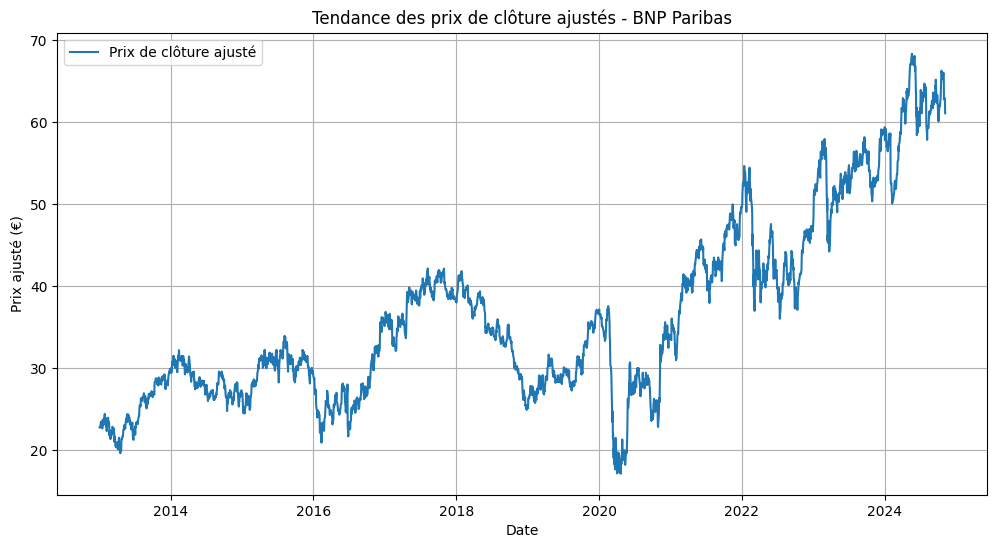

In [5]:
import matplotlib.pyplot as plt

# Tracer les prix de clôture ajustés
plt.figure(figsize=(12, 6))
plt.plot(bnp_data['Date'], bnp_data['Adj Close'], label='Prix de clôture ajusté')
plt.title("Tendance des prix de clôture ajustés - BNP Paribas")
plt.xlabel("Date")
plt.ylabel("Prix ajusté (€)")
plt.grid()
plt.legend()
plt.show()


## Moyenne mobile. 

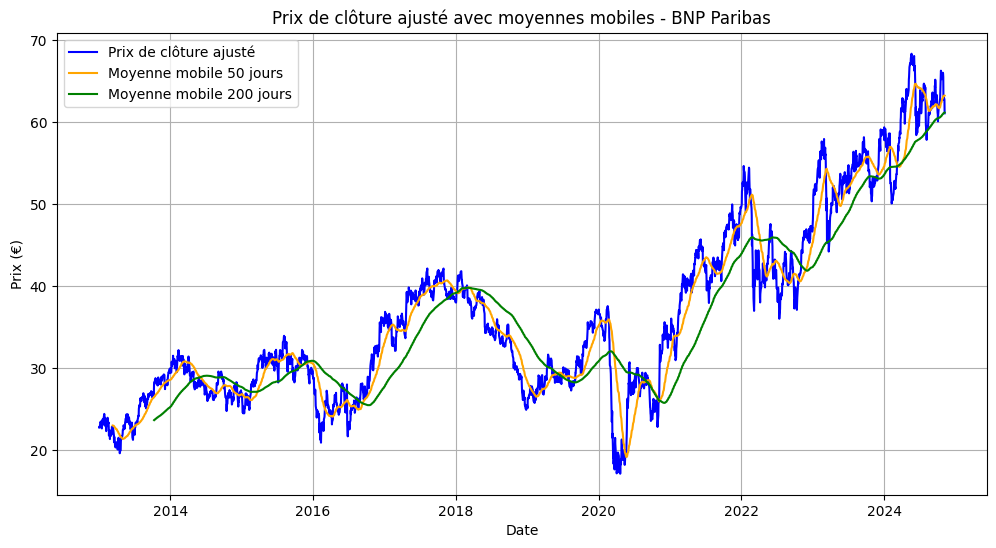

In [6]:
# Calcul des moyennes mobiles
bnp_data['SMA_50'] = bnp_data['Adj Close'].rolling(window=50).mean()
bnp_data['SMA_200'] = bnp_data['Adj Close'].rolling(window=200).mean()

# Tracer les prix de clôture ajustés et les moyennes mobiles
plt.figure(figsize=(12, 6))
plt.plot(bnp_data['Date'], bnp_data['Adj Close'], label='Prix de clôture ajusté', color='blue')
plt.plot(bnp_data['Date'], bnp_data['SMA_50'], label='Moyenne mobile 50 jours', color='orange')
plt.plot(bnp_data['Date'], bnp_data['SMA_200'], label='Moyenne mobile 200 jours', color='green')
plt.title("Prix de clôture ajusté avec moyennes mobiles - BNP Paribas")
plt.xlabel("Date")
plt.ylabel("Prix (€)")
plt.grid()
plt.legend()
plt.show()


### Graphique 1 : Prix de clôture ajusté avec moyennes mobiles

1. Prix de clôture ajusté (courbe bleue) :

    Tendance générale : La courbe bleue montre la performance historique de l'action BNP Paribas. Une tendance haussière ou baissière peut être observée :
    2013 - 2015 : Hausse modérée.
    2016 - 2018 : Hausse plus marquée, suivie d'une stabilisation.
    2020 : Une chute rapide (probablement liée à la pandémie COVID-19), suivie d'une forte reprise.
    Oscillations : Les fluctuations à court terme peuvent refléter la volatilité du marché, les annonces de résultats financiers, ou d'autres événements.

2. Moyennes mobiles (SMA 50 et SMA 200) :

    SMA 50 (orange) : Représente une tendance à moyen terme (50 jours). Réagit plus rapidement aux variations du prix.
    SMA 200 (vert) : Représente une tendance à long terme (200 jours). Réagit plus lentement, indiquant des tendances structurelles.
    Croisements des moyennes mobiles :
    Quand le SMA 50 croise au-dessus du SMA 200 : C'est souvent interprété comme un signal haussier ("Golden Cross").
    Quand le SMA 50 croise en dessous du SMA 200 : C'est un signal baissier potentiel ("Death Cross").

3. Tendance récente :

    Depuis 2020, la tendance est globalement haussière. Les prix oscillent autour des moyennes mobiles, mais le SMA 50 reste souvent au-dessus du SMA 200, indiquant un marché globalement positif.

## Volume de transaction

TypeError: only length-1 arrays can be converted to Python scalars

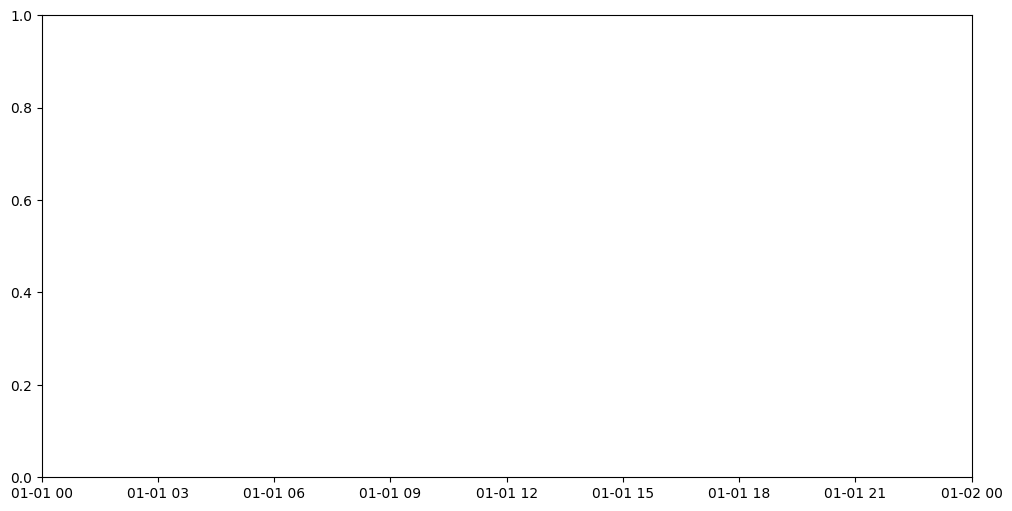

In [7]:
# Tracer le volume des transactions
plt.figure(figsize=(12, 6))
plt.bar(bnp_data['Date'], bnp_data['Volume'], color='gray', alpha=0.7)
plt.title("Volume des transactions - BNP Paribas")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(axis='y')
plt.show()

### Graphique 2 : Volume des transactions

1. Interprétation du volume :

    Le graphique en barres grises montre l'activité du marché en termes de volume d'actions échangées chaque jour.

    **Volumes élevés** :
    Indiquent des périodes de forte activité.
    Souvent associés à des événements majeurs, comme la publication de résultats financiers, des annonces macroéconomiques, ou des crises de marché.
    
    **Volumes faibles** :
    Peuvent refléter une période de calme ou un manque d'intérêt pour l'action.

2. Volumes en relation avec les prix :

    Les volumes élevés couplés à des mouvements de prix significatifs (à la hausse ou à la baisse) indiquent un fort consensus ou des réactions émotionnelles des investisseurs.
    
    **Exemple** : En 2020, un pic de volume peut être vu en même temps qu’une forte chute des prix (crise COVID).

## ARIMA Model 

ARIMA suppose que la série temporelle est stationnaire, c'est-à-dire que ses propriétés statistiques (moyenne, variance et covariance) sont constantes dans le temps.

Afin d'obtenir une série stationnaire, on va s'intéresser à la série des log return définie par $$R_t=log(P_t)-log(P_{t-1})$$ 

### Calcul des log returns

In [ ]:
import numpy as np

# Calcul des log returns à partir des prix ajustés
bnp_data['Log Return'] = np.log(bnp_data['Adj Close']) - np.log(bnp_data['Adj Close'].shift(1))
bnp_data.head()



,Date,Adj Close,Close,High,Low,Open,Volume,SMA_50,SMA_200,Log Return
0,2013-01-02,22.753109,44.459999,44.564999,43.419998,43.930000,3604846.0,NaN,NaN,NaN
1,2013-01-03,22.753109,44.459999,44.544998,44.014999,44.240002,1719620.0,NaN,NaN,0.000000
2,2013-01-04,22.714727,44.384998,44.720001,43.955002,44.360001,1969483.0,NaN,NaN,-0.001688
3,2013-01-07,23.136940,45.209999,46.064999,45.119999,45.250000,4186011.0,NaN,NaN,0.018417
4,2013-01-08,23.385141,45.695000,46.555000,45.064999,45.154999,4068024.0,NaN,NaN,0.010670


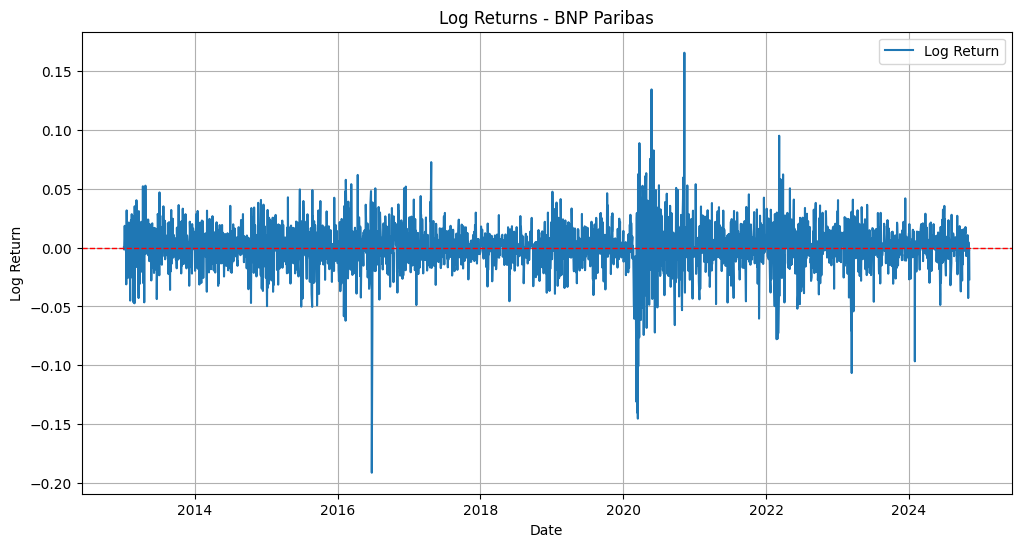

In [ ]:
import matplotlib.pyplot as plt

# Tracer les log returns
plt.figure(figsize=(12, 6))
plt.plot(bnp_data['Date'], bnp_data['Log Return'], label='Log Return')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Log Returns - BNP Paribas")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend()
plt.grid()
plt.show()

**Absence de tendance** :
Les log returns oscillent autour de 0, sans tendance visible à la hausse ou à la baisse.

**Variance constante** :
L'amplitude des fluctuations semble relativement stable sur l'ensemble de la période, bien que quelques pics (volatilité extrême) soient présents.

**Retour vers la moyenne** :
Les log returns reviennent toujours autour de 0 après des déviations, ce qui est une caractéristique des séries stationnaires.

### Test de stationnarité 

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Supprimez les valeurs NaN pour le test ADF
log_returns = bnp_data['Log Return'].dropna()

# Appliquer le test ADF
result = adfuller(log_returns)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:', result[4])


ADF Statistic: -11.103795083602098
p-value: 3.807113842663439e-20
Critical Values: {'1%': -3.4325193312999036, '5%': -2.8624984712561274, '10%': -2.567280219110819}


La p-value est inférieure à 0.05, on rejette l'hypothèse nulle donc la série est stationnaire. 

### Test d'autocorrélation

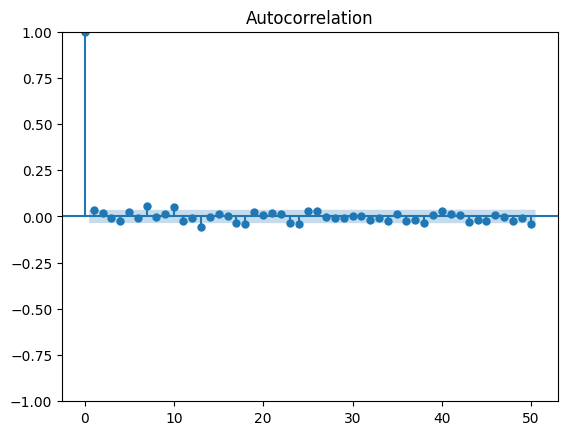

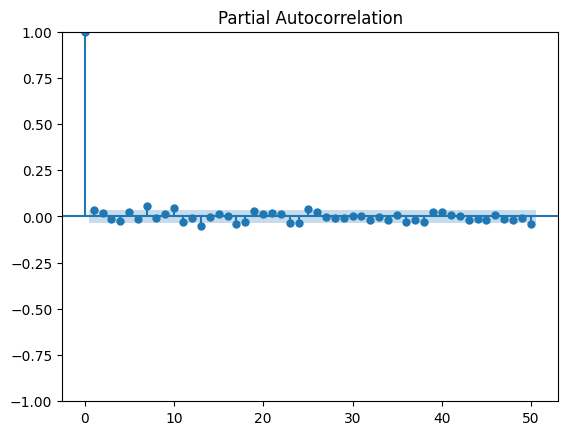

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Tracer les graphiques ACF et PACF
plot_acf(log_returns, lags=50)
plot_pacf(log_returns, lags=50)
plt.show()

Absence d'autocorrélation significative : pas de relation significative entre les valeurs passées et présentes des log returns.

**Série stationnaire et bruit blanc** :
Le comportement de ce graphique indique que les log returns peuvent être considérés comme un bruit blanc, une caractéristique des séries stationnaires.

### Conclusions pour le forecasting :

**Prévision difficile** : Les log returns eux-mêmes sont imprévisibles, car ils ne présentent pas de structure autocorrélée.

**Volatilité** : Pour aller plus loin, il serait pertinent de modéliser la volatilité (e.g., avec un modèle GARCH) plutôt que de tenter de prédire directement les log returns.

### Modélisation modèle ARIMA 

In [ ]:
# Supprimer les lignes contenant des NaN dans la colonne 'Log Return'
bnp_data_cleaned = bnp_data[['Date', 'Log Return', 'Adj Close']].dropna()

# Convertir la colonne 'Date' en index datetime
bnp_data_cleaned['Date'] = pd.to_datetime(bnp_data_cleaned['Date'])
bnp_data_cleaned.set_index('Date', inplace=True)

# S'assurer que l'index a une fréquence régulière (jours ouvrés ici)
bnp_data_cleaned = bnp_data_cleaned.asfreq('B')  # 'B' pour jours ouvrés

bnp_data_cleaned.head()


,Log Return,Adj Close
Date,,
2013-01-03,0.000000,22.753109
2013-01-04,-0.001688,22.714727
2013-01-07,0.018417,23.136940
2013-01-08,0.010670,23.385141
2013-01-09,-0.001204,23.356998


In [ ]:
# Fractionner les données
train_size = int(len(bnp_data_cleaned) * 0.8)
train, test = bnp_data_cleaned[:train_size], bnp_data_cleaned[train_size:]
# Vérifiez les tailles
print(f"Train size: {len(train)}, Test size: {len(test)}")

Train size: 2472, Test size: 618


In [ ]:
print(train.index[-1])  # Dernier index de l'entraînement
print(test.index[0])    # Premier index du test

2022-06-24 00:00:00
2022-06-27 00:00:00


In [ ]:
print(train.isnull().sum())  # Vérifiez les NaN dans l'entraînement
print(test.isnull().sum())   # Vérifiez les NaN dans le test


Log Return    39
Adj Close     39
dtype: int64
Log Return    9
Adj Close     9
dtype: int64


In [ ]:
train = train.interpolate(method='linear')
test = test.interpolate(method='linear')

In [ ]:
print(train.isnull().sum())  # Vérifiez que toutes les valeurs manquantes sont éliminées
print(test.isnull().sum())

Log Return    0
Adj Close     0
dtype: int64
Log Return    0
Adj Close     0
dtype: int64


In [ ]:
print(train.index.freq)  # Vérifiez la fréquence de train
print(test.index.freq)   # Vérifiez la fréquence de test

<BusinessDay>
<BusinessDay>


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Variable endogène : Log returns
endog = train['Log Return']

# Ajuster le modèle ARIMA
model = ARIMA(endog, order=(1, 0, 0))  # Exemple avec ARIMA(1, 0, 0)
model_fit = model.fit()

# Faire des prévisions
forecast = model_fit.forecast(steps=len(test))

# Vérifier les prévisions
print("Quelques prévisions de log returns :")
print(forecast.head())


Quelques prévisions de log returns :
2022-06-27    0.001272
2022-06-28    0.000295
2022-06-29    0.000255
2022-06-30    0.000253
2022-07-01    0.000253
Freq: B, Name: predicted_mean, dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcul des erreurs
rmse = np.sqrt(mean_squared_error(test['Log Return'], forecast))
mae = mean_absolute_error(test['Log Return'], forecast)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


RMSE: 0.01597194863362765
MAE: 0.011383035601988188


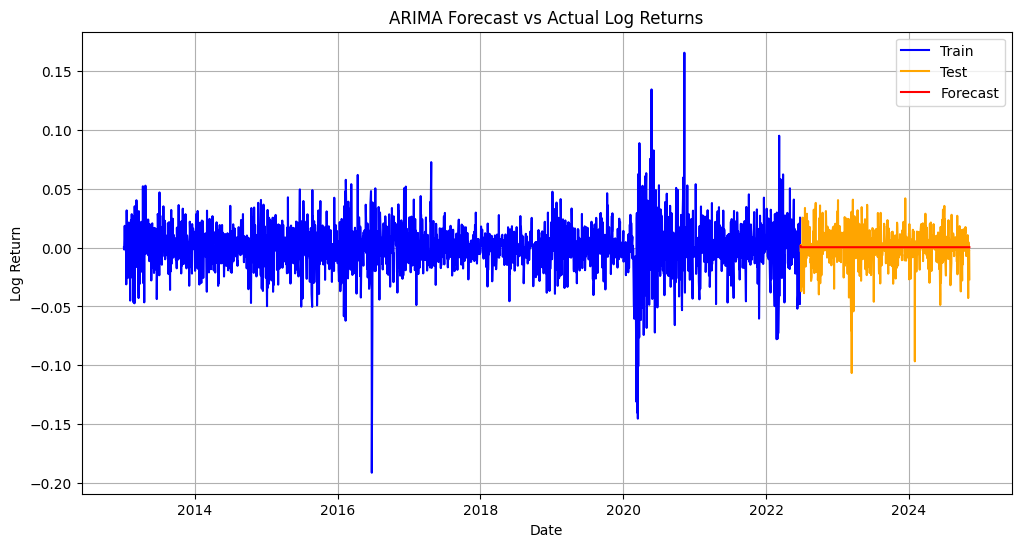

In [ ]:
import matplotlib.pyplot as plt

# Visualisation des log returns réels et prédits
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Log Return'], label='Train', color='blue')
plt.plot(test.index, test['Log Return'], label='Test', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title("ARIMA Forecast vs Actual Log Returns")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Dernier prix réel de l'ensemble d'entraînement
last_train_price = train['Adj Close'].iloc[-1]  # Dernier prix ajusté connu

# Convertir les log returns prédits en prix prédits
predicted_prices = [last_train_price]
for log_return in forecast:
    next_price = predicted_prices[-1] * np.exp(log_return)  # Conversion log return -> prix
    predicted_prices.append(next_price)

# Créer un DataFrame des prix prédits
predicted_prices = pd.Series(predicted_prices[1:], index=test.index, name='Predicted Price')


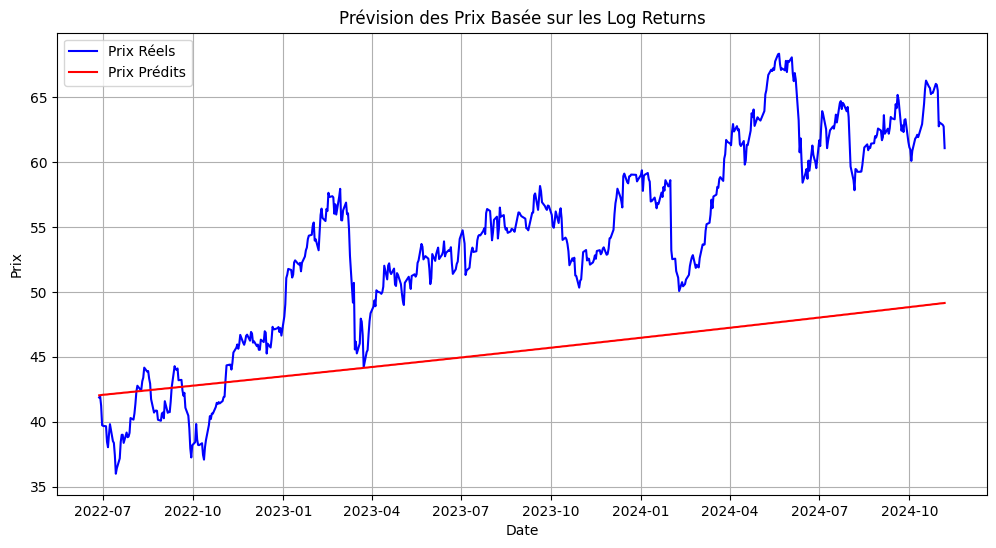

In [ ]:
# Prix réels sur l'ensemble de test
real_prices = test['Adj Close']

# Tracer les prix réels et prédits
plt.figure(figsize=(12, 6))
plt.plot(real_prices, label='Prix Réels', color='blue')
plt.plot(predicted_prices, label='Prix Prédits', color='red')
plt.title("Prévision des Prix Basée sur les Log Returns")
plt.xlabel("Date")
plt.ylabel("Prix")
plt.legend()
plt.grid()
plt.show()


## Garch Model

In [ ]:
# Rescaler les log returns
train_scaled = train['Log Return'] * 100
test_scaled = test['Log Return'] * 100


In [ ]:
from arch import arch_model

# Ajuster un modèle GARCH(1,1) sur les log returns rescalés
garch_model = arch_model(train_scaled, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit()

# Prévoir la variance conditionnelle sur la période de test
forecast = garch_fit.forecast(horizon=len(test_scaled))

# Extraire la variance conditionnelle prévue pour chaque point de test
predicted_variance = forecast.variance.iloc[-len(test_scaled):].values.flatten()  # Correspond à len(test_scaled)
predicted_volatility = np.sqrt(predicted_variance)  # Convertir la variance en écart type

print("Longueur de predicted_volatility :", len(predicted_volatility))

ModuleNotFoundError: No module named 'arch'

In [ ]:
# Générer des log returns simulés
simulated_log_returns = (predicted_volatility/100) * np.random.normal(0, 1, len(predicted_volatility))

print("Longueur de simulated_log_returns :", len(simulated_log_returns))

Longueur de simulated_log_returns : 618


In [ ]:
# Dernier prix connu de l'ensemble d'entraînement
last_train_price = train['Adj Close'].iloc[-1]

# Convertir les log returns simulés en prix prédits
predicted_prices = []
current_price = last_train_price
for log_return in simulated_log_returns:
    next_price = current_price * np.exp(log_return)  # Convertir le log return en prix
    predicted_prices.append(next_price)
    current_price = next_price

# Créer une série Pandas pour les prix prédits
predicted_prices = pd.Series(predicted_prices, index=test.index, name='Predicted Price')

print("Longueur de predicted_prices :", len(predicted_prices))



Longueur de predicted_prices : 618


In [ ]:
print("Longueur de predicted_volatility :", len(predicted_volatility))
print("Longueur de simulated_log_returns :", len(simulated_log_returns))
print("Longueur de predicted_prices :", len(predicted_prices))
print("Longueur de test :", len(test))

Longueur de predicted_volatility : 618
Longueur de simulated_log_returns : 618
Longueur de predicted_prices : 618
Longueur de test : 618


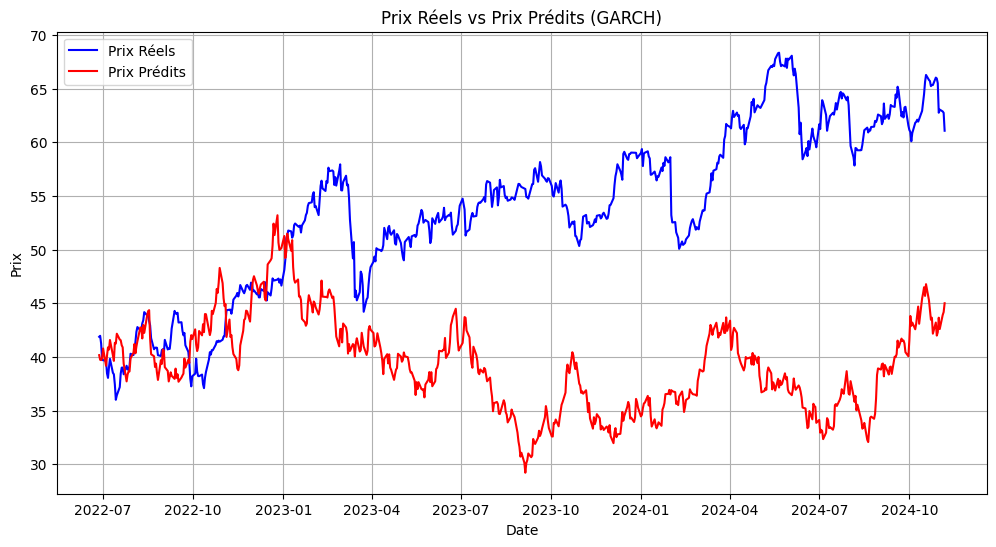

In [ ]:
# Prix réels
real_prices = test['Adj Close']

# Tracer les prix réels et prédits
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(real_prices, label='Prix Réels', color='blue')
plt.title("Prix Réels vs Prix Prédits (GARCH)")
plt.plot(predicted_prices, label='Prix Prédits', color='red')
plt.xlabel("Date")
plt.ylabel("Prix")
plt.legend()
plt.grid()
plt.show()

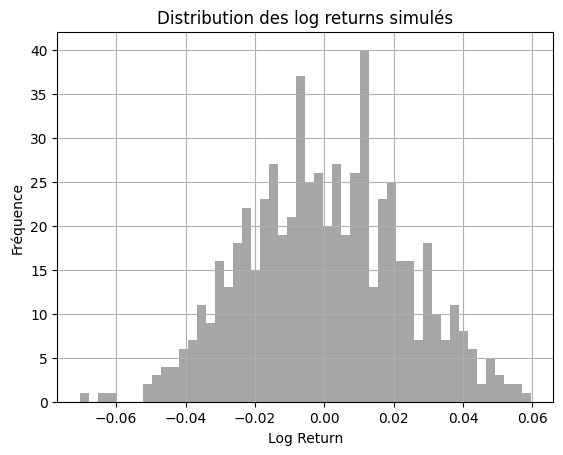

In [ ]:
# Histogramme des log returns simulés
plt.hist(simulated_log_returns, bins=50, color='gray', alpha=0.7)
plt.title("Distribution des log returns simulés")
plt.xlabel("Log Return")
plt.ylabel("Fréquence")
plt.grid()
plt.show()

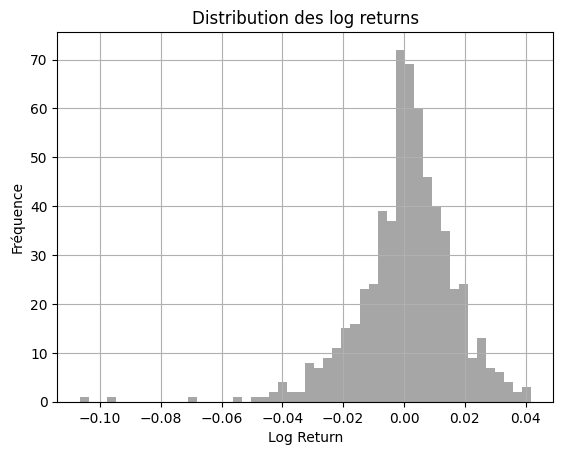

In [ ]:
# Histogramme des log returns simulés
plt.hist(test['Log Return'], bins=50, color='gray', alpha=0.7)
plt.title("Distribution des log returns")
plt.xlabel("Log Return")
plt.ylabel("Fréquence")
plt.grid()
plt.show()

## LSTM 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
# Normaliser les prix ajustés ou log returns
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(train[['Adj Close']].values)

# Vérifier les données normalisées
print(scaled_data[:5])

[[0.15069651]
 [0.14967431]
 [0.16091986]
 [0.16753083]
 [0.16678118]]


In [ ]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, 0])  # Sequence of `seq_length`
        y.append(data[i+seq_length, 0])   # Value to predict
    return np.array(X), np.array(y)

# Créer des séquences avec une fenêtre glissante de 60 jours (par exemple)
seq_length = 60
X_train, y_train = create_sequences(scaled_data, seq_length)

# Ajouter une dimension pour les LSTM (échantillon, time_step, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

In [ ]:
model = Sequential()

# Première couche LSTM
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Deuxième couche LSTM
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Troisième couche LSTM
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Couche dense pour la prédiction
model.add(Dense(units=1))

# Compiler le modèle
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
68/68 [==============================] - 7s 61ms/step - loss: 0.0138 - val_loss: 0.0058
Epoch 2/20
68/68 [==============================] - 4s 53ms/step - loss: 0.0038 - val_loss: 0.0064
Epoch 3/20
68/68 [==============================] - 4s 55ms/step - loss: 0.0035 - val_loss: 0.0080
Epoch 4/20
68/68 [==============================] - 4s 55ms/step - loss: 0.0031 - val_loss: 0.0048
Epoch 5/20
68/68 [==============================] - 4s 56ms/step - loss: 0.0026 - val_loss: 0.0038
Epoch 6/20
68/68 [==============================] - 4s 55ms/step - loss: 0.0024 - val_loss: 0.0039
Epoch 7/20
68/68 [==============================] - 4s 54ms/step - loss: 0.0023 - val_loss: 0.0041
Epoch 8/20
68/68 [==============================] - 4s 55ms/step - loss: 0.0022 - val_loss: 0.0034
Epoch 9/20
68/68 [==============================] - 4s 54ms/step - loss: 0.0021 - val_loss: 0.0084
Epoch 10/20
68/68 [==============================] - 4s 56ms/step - loss: 0.0024 - val_loss: 0.0044
Epoch 11/

In [ ]:
# Normaliser les données de test
test_data = scaler.transform(test[['Adj Close']].values)

# Créer des séquences pour le test
X_test, y_test = create_sequences(test_data, seq_length)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_prices = model.predict(X_test)

# Revenir à l'échelle d'origine
predicted_prices = scaler.inverse_transform(predicted_prices)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

18/18 [==============================] - 1s 18ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test, predicted_prices))
mae = mean_absolute_error(y_test, predicted_prices)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 1.6901915396105966
MAE: 1.400892613181931


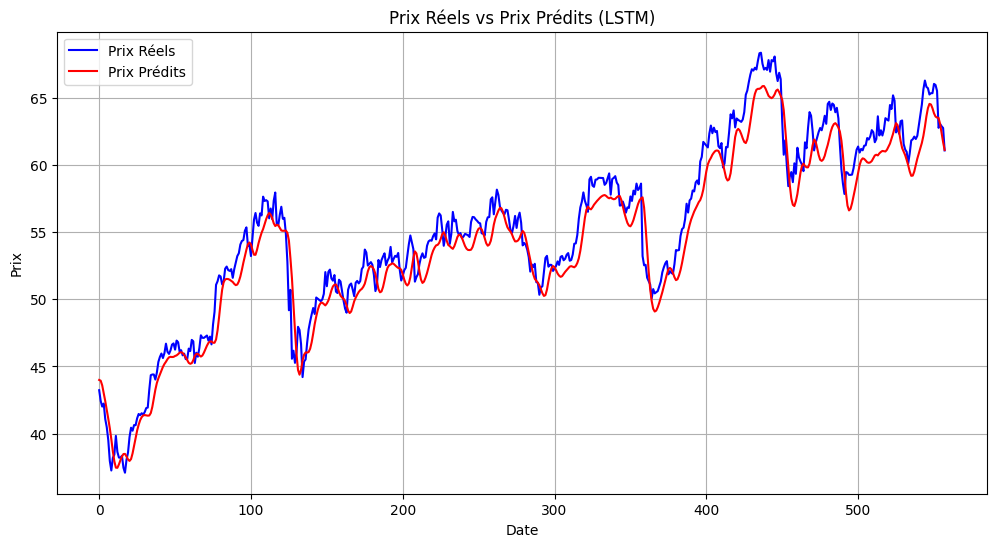

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Prix Réels', color='blue')
plt.plot(predicted_prices, label='Prix Prédits', color='red')
plt.title("Prix Réels vs Prix Prédits (LSTM)")
plt.xlabel("Date")
plt.ylabel("Prix")
plt.legend()
plt.grid()
plt.show()